# Poisson Verteilung:
- Mittels `numpy.random` eine Liste mit Zufallszahlen füllen
- Häufigkeit aller Zahlen herausfinden 
- Graphisch auswerten
    - Plot der Verteilung 
    - curve fit durch die Verteilung (Polynomisch)
- Einlesen von echten Spielergebnissen + Vergleich

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize 
import pandas as pd
import scipy.stats
%matplotlib inline

## Liste erstellen

In [4]:
poisson_list = []               # Instanziieren der (noch) leeren Liste

In [5]:
n = 500
Lambda = 5

for i in range(n):
    poisson_list.append(np.random.poisson(Lambda)) # Füllen der Liste

poisson_list[0:10]             # Anzeigen der ersten 10 Listenelemente 

[9, 3, 5, 6, 6, 4, 9, 4, 6, 2]

## Darstellen der Ergebnisse

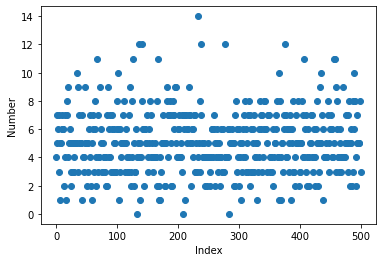

In [3]:
fig, ax = plt.subplots()
ax.scatter([i for i in range(n)], poisson_list)
ax.set(ylabel="Number", xlabel="Index");

## Häufigkeit der Zahlen

In [6]:
def count_occurences(list_to_check: list) -> list:
    '''
    welche Elemente kommen in der Liste vor und wie oft?
    '''
    members = []
    occurence = []
    list_to_check.sort()
    members.append(list_to_check[0])
    for i, number_from_list in enumerate(list_to_check[0:-1]):
        if number_from_list != list_to_check[i+1]:
            members.append(list_to_check[i+1])
    for member in members:
        count = 0
        for number_from_list in list_to_check:
            if number_from_list == member:
                count +=1
        occurence.append(count)
    return members, occurence

In [7]:
number, count = np.unique(poisson_list, return_counts=True)

## Plot der Verteilungsdichte

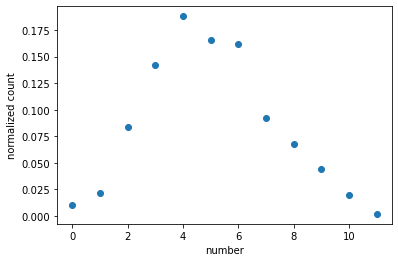

In [8]:
fig, ax = plt.subplots()
ax.scatter(number, [i/n for i in count])
ax.set(xlabel="number", ylabel="normalized count");

## Curve fit

In [9]:
# Definition der Polynome
def pol2(x, a,b,c):
    return a*x**2+b*x+c
def pol3(x, a,b,c,d):
    return a*x**3+b*x**2+c*x+d
def pol4(x, a,b,c,d,e):
    return a*x**4+b*x**3+c*x**2+d*x+e
def pol5(x, a,b,c,d,e,f):
    return a*x**5+b*x**4+c*x**3+d*x**2*e*x+f
def pol6(x, a,b,c,d,e,f,g):
    return a*x**6+b*x**5+c*x**4+d*x**3*e*x**2*f*x*g

In [10]:
def poisson_func(k: int, lamb: float) -> int:
    '''poisson Funktion für den Fit'''
    return scipy.stats.poisson.pmf(k, lamb)

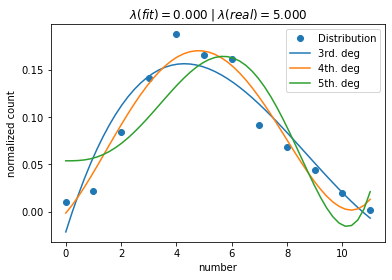

In [11]:
newx = np.linspace(min(poisson_list), max(poisson_list)) # neue x-werte

## plot der daten + fit(s)
fig,ax = plt.subplots()
ax.plot(number, [i/n for i in count],ls="", marker="o",color="tab:blue", label="Distribution")

# popt, pcov = scipy.optimize.curve_fit(pol2, number, [i/n for i in count], )
# ax.plot(newx, pol2(newx, *popt), label="2nd. deg.")

popt, pcov = scipy.optimize.curve_fit(pol3, number, [i/n for i in count], ) # fit an Polynom 3. Ordnung
ax.plot(newx, pol3(newx, *popt), label="3rd. deg")                          # plot des Polynoms mit "neuen x-werten" 

popt, pcov = scipy.optimize.curve_fit(pol4, number, [i/n for i in count], ) # fit an Polynom 4. Ordnung
ax.plot(newx, pol4(newx, *popt), label="4th. deg")

popt, pcov = scipy.optimize.curve_fit(pol5, number, [i/n for i in count], )
ax.plot(newx, pol5(newx, *popt), label="5th. deg")

# popt, pcov = scipy.optimize.curve_fit(pol6, number, [i/n for i in count], )
# ax.plot(newx, pol6(newx, *popt), label="6th. deg")

# popt, pcov = scipy.optimize.curve_fit(poisson_func, number, [i/n for i in count]) # fit
# ax.plot(number, poisson_func(number, *popt), label="Fit")

ax.set(ylabel="normalized count", xlabel="number", title=r"$\lambda(fit) = {0:.3f}\;|\; \lambda(real) = {1:.3f}$".format(popt[0], Lambda))
ax.legend();

## Eignung der Poisson-Verteilung:
- Daten aus vergangen Spielen einlesen
- Häufigkeitsverteilung erstellen + plotten
- Poissonverteilung erstellen + plotten 

### Für eine Saison --> eine einzulesende Datei

In [12]:
df = pd.read_excel("FootStats_2021.xlsx") # Einlesen der Datei
df.rename(columns={"Unnamed: 2": "Goals Home", "Unnamed: 4": "Goals Away"}, inplace=True) # Aufräumen
df # Ausgabe der Tabelle

,Date,Home,Goals Home,Away,Goals Away,Referee,Result
0,2021-05-22,Bayern Munich,5,Augsburg,2,NaN,H
1,2021-05-22,Dortmund,3,Leverkusen,1,NaN,H
2,2021-05-22,Ein Frankfurt,3,Freiburg,1,NaN,H
3,2021-05-22,FC Koln,1,Schalke 04,0,NaN,H
4,2021-05-22,Hoffenheim,2,Hertha,1,NaN,H
...,...,...,...,...,...,...,...
301,2020-09-19,Stuttgart,2,Freiburg,3,NaN,A
302,2020-09-19,Union Berlin,1,Augsburg,3,NaN,A
303,2020-09-19,Werder Bremen,1,Hertha,4,NaN,A
304,2020-09-19,Dortmund,3,M'gladbach,0,NaN,H


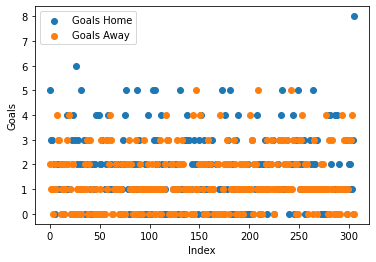

In [13]:
# Plot der Spielergebnisse
fig, ax = plt.subplots()
ax.scatter(df.index, df["Goals Home"], label="Goals Home")
ax.scatter(df.index, df["Goals Away"], label="Goals Away")
ax.set(ylabel="Goals", xlabel="Index")
ax.legend();

In [10]:
frequency_dist_home = np.unique(df["Goals Home"], return_counts=True)
frequency_dist_away = np.unique(df["Goals Away"], return_counts=True)

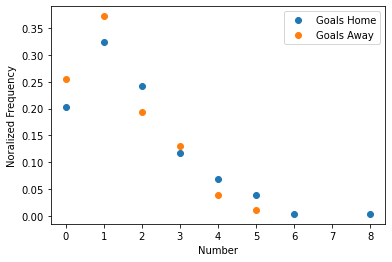

In [11]:
# Plot der Verteilungsdichte
fig, ax = plt.subplots()
ax.plot(frequency_dist_home[0], frequency_dist_home[1]/len(df), marker="o", ls="", label="Goals Home")
ax.plot(frequency_dist_away[0], frequency_dist_away[1]/len(df), marker="o", ls="", label="Goals Away")

ax.set(ylabel="Noralized Frequency", xlabel="Number")
ax.legend();

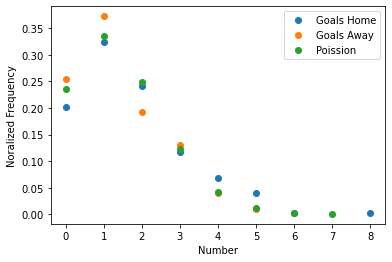

In [12]:
# Vergleich mit einer Poisson-Verteilung
n = 10000
Lambda = 1.455
frequency_dist_poisson = np.unique(np.random.poisson(Lambda, n), return_counts=True) # Erzeugen der Possion verteilung + Zählen der Häufigkeiten der Ereignisse

fig, ax = plt.subplots()
ax.plot(frequency_dist_home[0], frequency_dist_home[1]/len(df), marker="o", ls="", label="Goals Home")
ax.plot(frequency_dist_away[0], frequency_dist_away[1]/len(df), marker="o", ls="", label="Goals Away")
ax.plot(frequency_dist_poisson[0], frequency_dist_poisson[1]/n, marker="o", ls="", label="Poission")

ax.set(ylabel="Noralized Frequency", xlabel="Number")
ax.legend();

### Für mehrere Saisons --> mehrere einzulesende Dateien

In [13]:
data_Bundesliga = []             # leeres array um die Daten zu halten
for season in ["2021", "2122"]:
    df = pd.read_excel("FootStats_{}.xlsx".format(season)) # einlesen der Daten und speichern im Array
    data_Bundesliga.append(df)

In [14]:
df = pd.concat(data_Bundesliga)
df.rename(columns={"Unnamed: 2": "Goals Home", "Unnamed: 4": "Goals Away"}, inplace=True)
df

,Date,Home,Goals Home,Away,Goals Away,Referee,Result
0,2021-05-22,Bayern Munich,5,Augsburg,2,NaN,H
1,2021-05-22,Dortmund,3,Leverkusen,1,NaN,H
2,2021-05-22,Ein Frankfurt,3,Freiburg,1,NaN,H
3,2021-05-22,FC Koln,1,Schalke 04,0,NaN,H
4,2021-05-22,Hoffenheim,2,Hertha,1,NaN,H
...,...,...,...,...,...,...,...
301,2021-08-14,Stuttgart,5,Greuther Furth,1,NaN,H
302,2021-08-14,Union Berlin,1,Leverkusen,1,NaN,D
303,2021-08-14,Wolfsburg,1,Bochum,0,NaN,H
304,2021-08-14,Dortmund,5,Ein Frankfurt,2,NaN,H


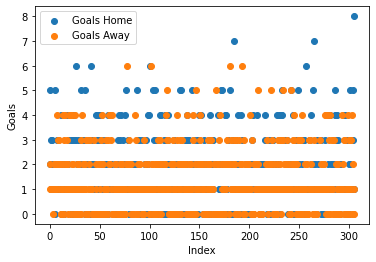

In [15]:
fig, ax = plt.subplots()
ax.scatter(df.index, df["Goals Home"], label="Goals Home")
ax.scatter(df.index, df["Goals Away"], label="Goals Away")
ax.set(ylabel="Goals", xlabel="Index")
ax.legend();

In [16]:
frequency_dist_home = np.unique(df["Goals Home"], return_counts=True)
frequency_dist_away = np.unique(df["Goals Away"], return_counts=True)

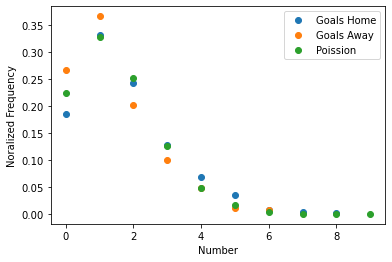

In [17]:
n = 10000
frequency_dist_poisson = np.unique(np.random.poisson(1.5, n), return_counts=True)

fig, ax = plt.subplots()
ax.plot(frequency_dist_home[0], frequency_dist_home[1]/len(df), marker="o", ls="", label="Goals Home")
ax.plot(frequency_dist_away[0], frequency_dist_away[1]/len(df), marker="o", ls="", label="Goals Away")
ax.plot(frequency_dist_poisson[0], frequency_dist_poisson[1]/n, marker="o", ls="", label="Poission")

ax.set(ylabel="Noralized Frequency", xlabel="Number")
ax.legend();

### Lambda-Wert der Poisson-Verteilung durch Fit ermitteln:

In [18]:
fit_home = scipy.optimize.curve_fit(poisson_func, frequency_dist_home[0], frequency_dist_home[1]/len(df))
fit_away = scipy.optimize.curve_fit(poisson_func, frequency_dist_away[0], frequency_dist_away[1]/len(df))
Lambda_mean = (fit_home[0]+fit_away[0])/2

print("Lambda für Heimmannschaft: {0:.3f}".format(float(fit_home[0])))
print("Lambda für Auswärtsmannschaft: {0:.3f}".format(float(fit_away[0])))
print("Mittlewert: {0:.3f}".format(float(Lambda_mean)))

Lambda für Heimmannschaft: 1.624
Lambda für Auswärtsmannschaft: 1.286
Mittlewert: 1.455
